In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

train_ds =pd.read_csv("C:/Users/sh/Pictures/Machine Learning (Codes and Data Files)/Data/sentiment_train",delimiter="\t")

In [3]:
train_ds.shape

(6918, 2)

In [4]:
train_ds.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [7]:
pd.set_option('max_colwidth',800)
train_ds[train_ds.sentiment==1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [8]:
train_ds[train_ds.sentiment==0].head()

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


# EDA

In [9]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

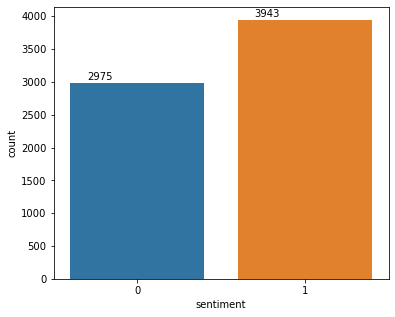

In [12]:
plt.figure(figsize=(6,5))

#create count plot
ax=sn.countplot(x='sentiment',data=train_ds)

#Annotate

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+50))

# Text Pre-processing

Creating count vectors for sentiment_train Dataset

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
#Initialize the CountVectorizer
count_vectorizer=CountVectorizer()
#create the dictionary from the corpus
feature_vector=count_vectorizer.fit(train_ds.text)
#get the feature names
features=feature_vector.get_feature_names()
features
print("Total number of features :",len(features))

Total number of features : 2132


In [17]:
import random
random.sample(features,10)

['keep',
 'picnic',
 'dakota',
 'gn',
 'didn',
 'she',
 'fucking',
 'hoffman',
 'jack',
 'they']

In [18]:
train_ds_features=count_vectorizer.transform(train_ds.text)
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [19]:
train_ds_features.shape

(6918, 2132)

In [21]:
#Number of actual non-zeros values
train_ds_features.getnnz()

65398

In [24]:
print("Density of the matrix: ",train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix:  0.4434010415225908


The matrix has less than 1% non-zero values, that is more than 99% values are zero values.

# Displaying document vectors. 

to visualize the count vectors, we will convert this matrix into DataFrame and set the column names to the actual feature names.

The following codes are for displaying count vectors:-

In [26]:
#converting the matrix into a dataframe
train_ds_df=pd.DataFrame(train_ds_features.todense())

#setting the columns names to the feature names i.e. words
train_ds_df.columns=features

In [28]:
train_ds[0:1]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.


In [29]:
train_ds_df.iloc[0:1,150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


In [30]:
train_ds_df[['away','awesome','awesomely','awesomeness','awesomest','awful','awkward']][0:1]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


# Removing low-frequency words

In [32]:
#summing up the occurences of features column wise
features_counts=np.sum(train_ds_features.toarray(),axis=0)
features_count_df=pd.DataFrame(dict(features=features,counts=features_counts))

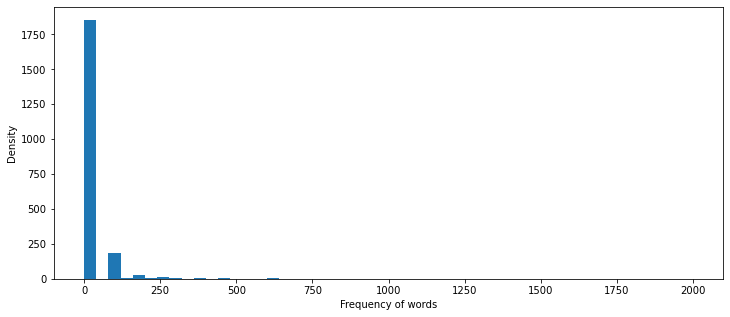

In [37]:
plt.figure(figsize=(12,5))
plt.hist(features_count_df.counts,bins=50,range=(0,2000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')
plt.show()

In [39]:
len(features_count_df[features_count_df.counts==1])

1228

In [45]:
#Initialize countvectorizer
count_vectorizer=CountVectorizer(max_features=1000)
#create the dictionary form of corpus
feature_vector=count_vectorizer.fit(train_ds.text)
#get the feature name
features=feature_vector.get_feature_names()
#Transform the document into vectors
train_ds_features=count_vectorizer.transform(train_ds.text)

#Count the frequency of the features
features_counts=np.sum(train_ds_features.toarray(),axis=0)

feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))

In [46]:
feature_counts.sort_values('counts',ascending=False)[0:15]

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


# Removing Stop Words

skelarn_feature_extraction.text provides a list of pre-defined stop words in English, which can be used as a inference to remove
the stop words from the dictionary, i.e. feature set.

In [47]:
from sklearn.feature_extraction import text
my_stop_words=text.ENGLISH_STOP_WORDS

#printing first few stop words
print("Few Stop Words :",list(my_stop_words)[0:10])

Few Stop Words : ['must', 'alone', 'three', 'both', 'eight', 'an', 'to', 'she', 'interest', 'see']


In [48]:
#Adding custom words to the list of stop words
my_stop_words=text.ENGLISH_STOP_WORDS.union(['harry','potter','code','vinci','da','harry','mountain','movie','movies'])

# Creating Count Vectors

All vectorizer take a list of stop words as a parameter and remove the stop words while building the dictionary or feature set.
And these words will not appear in the count vectors representing the documents. We will create new count vectors by passing
the my_stop_words as stop words list.

In [50]:
#setting stop words list

count_vectorizer=CountVectorizer(stop_words=my_stop_words,max_features=1000)

create_vector=count_vectorizer.fit(train_ds.text)

train_ds_features=count_vectorizer.transform(train_ds.text)

features=feature_vector.get_feature_names()

features_counts=np.sum(train_ds_features.toarray(),axis=0)

feature_count=pd.DataFrame(dict(features=features,count=features_counts))

# Stemming and Lemmatization

In [55]:
from nltk.stem.snowball import PorterStemmer

stemmer=PorterStemmer()

analyzer=CountVectorizer().build_analyzer()

#Custom function for stemming and stop word removal

def stemmed_words(doc):   
    ### Stemming of words    
    stemmed_words = (stemmer.stem(w) for w in analyzer(doc))   
    ### Remove the words in stop words list   
    non_stop_words = [ word for word in list(set(stemmed_words) - set(my_stop_words)) ]   
    return non_stop_words

In [59]:
count_vectorizer=CountVectorizer(analyzer=stemmed_words,max_features=1000)

feature_vector=count_vectorizer.fit(train_ds.text)

train_ds_features=count_vectorizer.transform(train_ds.text)
features=feature_vector.get_feature_names()
features_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))
feature_counts.sort_values("counts",ascending=False)[0:15]

,features,counts
80,brokeback,1930
297,harri,1916
407,love,1837
803,suck,1378
922,wa,1142
43,awesom,1116
345,imposs,1090
433,mission,1090
439,movi,1052
393,like,823


# Distribution of words Across Different Sentiment

In [60]:
#convert the document vector matrix into dataframe
train_ds_df=pd.DataFrame(train_ds_features.todense())

#Assign the features names to the column

train_ds_df.columns=features

#Assign the sentiment labels to the train_ds

train_ds_df['sentiment']=train_ds.sentiment

<AxesSubplot:xlabel='sentiment', ylabel='awesom'>

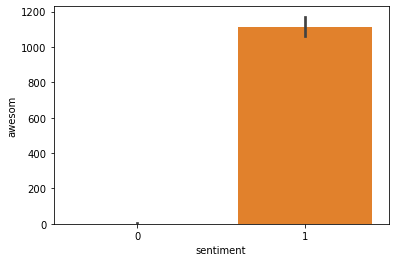

In [61]:
sn.barplot(x='sentiment',y='awesom',data=train_ds_df,estimator=sum)

<AxesSubplot:xlabel='sentiment', ylabel='realli'>

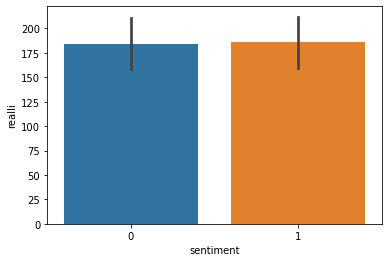

In [62]:
sn.barplot(x='sentiment',y='realli',data=train_ds_df,estimator=sum)

The word realli(stemmed word for really) occurs almost equally across positive and negative sentiments.

<AxesSubplot:xlabel='sentiment', ylabel='hate'>

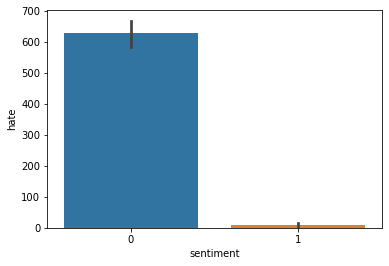

In [63]:
sn.barplot(x='sentiment',y='hate',data=train_ds_df,estimator=sum)

# Naive-Bayes Model for sentiment classification

# Split the data set into training and test data sets

In [64]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(train_ds_features,train_ds.sentiment,test_size=0.3,random_state=42)

# Build Naive-Bayes Model

In [65]:
from sklearn.naive_bayes import BernoulliNB

nb_clf=BernoulliNB()

nb_clf.fit(train_x.toarray(),train_y)

BernoulliNB()

# Make predictions on Test Case

In [66]:
test_ds_predicted=nb_clf.predict(test_x.toarray())

In [68]:
test_ds_predicted

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

# Finding the Model Accuracy

In [69]:
from sklearn import metrics 
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



Model is classifying with high accuracy. Both average precision and recall us about 98% for identifying positive and negative 
sentiment documents.

<AxesSubplot:>

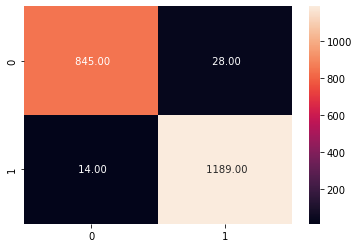

In [70]:
cm=metrics.confusion_matrix(test_y,test_ds_predicted)
sn.heatmap(cm,annot=True,fmt=' .2f')

Model prediction is that, there are only 14 positive sentiment classified wrongly as negative documents(False Negative) and 
there are only 28 negative sentiment documents classified wrongly as positive sentiment documents (False Positives).